In [1]:
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
exps = glob('Compiled/*')
vcs = glob('Inbal/*/value_counts*')

In [3]:
convert = {
    '590': '10',
    '610': '8',
    '620': '7',
    '630': '6a',
    '640': '6B',
}

In [4]:
vc_dict = {}

for vc in vcs:
    key = vc.split('/')[1]
    test = pd.read_csv(vc)
    vc_dict[key] = test

In [5]:
exp_dict = {}

for exp in exps:

    nm = exp.split('_')[1].split(' ')[0]
    
    with open(exp) as fp:
        #The first 14 lines of the qTable do not contain spectrum data
        for blank in range(0,2):
            fp.readline()
        wave = []
        Q_ext = []
#         Q_abs = []
#         Q_sca = []
        for line in fp:
            ary = line.split(",")
            wave.append(float(ary[0]))
            Q_ext.append(float(ary[1]))


        df = pd.DataFrame({'wave': wave, 'Q_ext': Q_ext})
        exp_dict[nm] = df
        exp_dict[nm] = exp_dict[nm].drop(range(0, 100)).reset_index(drop=True)
#         exp_dict[nm] = exp_dict[nm].iloc[::2, :].reset_index(drop=True)

In [6]:
x_dict = {}
for x in glob('x*new_interp*.csv'):
    test = pd.read_csv(x)
    x_dict[int(x.split('_')[1])] = test

    
yz_dict = {}
for yz in glob('yz*new_interp*.csv'):
    test = pd.read_csv(yz)
    yz_dict[int(yz.split('_')[1])] = test
    
net_dict = {}
for key in x_dict:
    net_dict[key] = x_dict[key] * (1.0/3.0) + yz_dict[key] * (2.0/3.0)

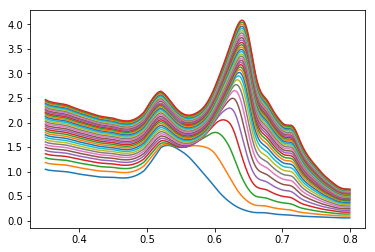

In [8]:
for i in range(2, 36):
    plt.plot(net_dict[i]['wl'], net_dict[i]['1.15'], label=f'{i}')


In [199]:
net_dict[2]

,Unnamed: 0,wl,0.80,0.85,0.90,0.95,1.00,1.05,1.10,1.15,...,3.55,3.60,3.65,3.70,3.75,3.80,3.85,3.90,3.95,4.00
0,0.0,0.3500,1.044837,1.045027,1.045211,1.045388,1.045559,1.045724,1.045882,1.046033,...,1.045690,1.045524,1.045352,1.045173,1.044988,1.044796,1.044598,1.044393,1.044182,1.043965
1,1.0,0.3505,1.042746,1.042928,1.043104,1.043273,1.043437,1.043595,1.043747,1.043893,...,1.043831,1.043683,1.043529,1.043369,1.043202,1.043030,1.042852,1.042667,1.042477,1.042281
2,2.0,0.3510,1.040753,1.040933,1.041107,1.041274,1.041436,1.041592,1.041741,1.041885,...,1.041778,1.041630,1.041476,1.041316,1.041149,1.040977,1.040799,1.040615,1.040425,1.040229
3,3.0,0.3515,1.038807,1.038987,1.039162,1.039330,1.039493,1.039649,1.039799,1.039943,...,1.039624,1.039467,1.039304,1.039134,1.038959,1.038777,1.038589,1.038395,1.038195,1.037988
4,4.0,0.3520,1.036854,1.037036,1.037213,1.037382,1.037546,1.037703,1.037853,1.037998,...,1.037463,1.037296,1.037124,1.036944,1.036759,1.036567,1.036368,1.036164,1.035953,1.035735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,896.0,0.7980,0.061288,0.060374,0.059480,0.058604,0.057746,0.056908,0.056088,0.055287,...,0.038876,0.038994,0.039130,0.039285,0.039458,0.039651,0.039862,0.040091,0.040340,0.040607
897,897.0,0.7985,0.061309,0.060388,0.059486,0.058603,0.057740,0.056895,0.056069,0.055262,...,0.038902,0.039027,0.039171,0.039334,0.039517,0.039718,0.039938,0.040177,0.040435,0.040713
898,898.0,0.7990,0.061325,0.060397,0.059488,0.058599,0.057729,0.056878,0.056046,0.055234,...,0.038924,0.039057,0.039209,0.039380,0.039571,0.039781,0.040010,0.040258,0.040526,0.040813
899,899.0,0.7995,0.061336,0.060401,0.059485,0.058589,0.057713,0.056856,0.056019,0.055201,...,0.038942,0.039082,0.039242,0.039421,0.039620,0.039839,0.040077,0.040334,0.040611,0.040908


590
610
620
630
640


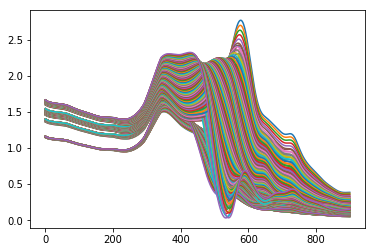

In [201]:
import numpy as np

best_dict = {}

for peak in convert:
    print(peak)
    exp_temp = exp_dict[peak]
    
    vc_temp = vc_dict[convert[peak]]
    vc_temp = vc_temp.reset_index()
    
    best_error = 10000000
    best_sp = -1.0
    best_testing = None
    
    
    for sp in np.arange(0.8, 4.05, 0.05):
        total_count = 0
        
        test_spectra = exp_dict[peak].copy()
        test_spectra['Q_ext'] = 0.0
        
        for _, row in vc_temp.iterrows():
            
            leng = row['Size']
            num = row['Count']
            
            if leng > 30:
                break
            
            spdf = net_dict[leng]['%.2f' % sp]
            test_spectra['Q_ext'] += spdf * num
            total_count += num
        
        test_spectra['Q_ext'] = test_spectra['Q_ext'] / total_count
        
        testing = test_spectra.join(exp_temp, rsuffix='exp').drop('waveexp', axis=1)
        testing['Q_ext'] = testing['Q_ext'] / testing['Q_ext'].max()
        testing['Q_extexp'] = testing['Q_extexp'] / testing['Q_extexp'].max()

        diff_350 = testing['Q_ext'][0] - testing['Q_extexp'][0]
        testing['Q_extexp'] += diff_350
        
        error = ((testing['Q_ext'] - testing['Q_extexp']) ** 2).sum()
        
#         plt.plot(testing['wave'], testing['Q_ext'], label='theory')
#         plt.plot(testing['wave'], testing['Q_extexp'], label='exp')
#         plt.legend()
        
        if error < best_error:
            best_error = error
            best_sp = sp
            best_testing = testing
        
    best_dict[peak] = (best_sp, best_testing)
    

Text(0.5, 1.0, 'peak_590_1.25nm_spacing')

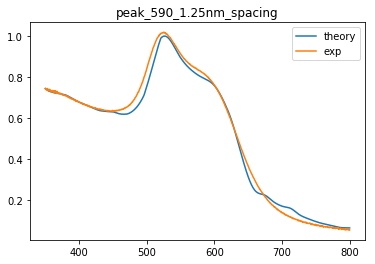

In [203]:
sample = '590'
best, best_df = best_dict[sample]

plt.plot(best_df['wave'], best_df['Q_ext'], label='theory')
plt.plot(best_df['wave'], best_df['Q_extexp'], label='exp')
plt.legend()

best = '%.2f' % best

plt.title(f'peak_{sample}_{best}nm_spacing')

In [144]:
wb = pd.read_excel('gap_measuring.xlsx')
gap_histo = wb['Gap Distance (nm)']


In [145]:
df = pd.DataFrame({'pixel_size': wb['Pixel Size of Item(nm)'], 'gap_distance': wb['Gap Distance (nm)']})
df[df['pixel_size'] <= .25].mean()

pixel_size      0.196706
gap_distance    2.256224
dtype: float64

Text(0, 0.5, 'Gap Distance')

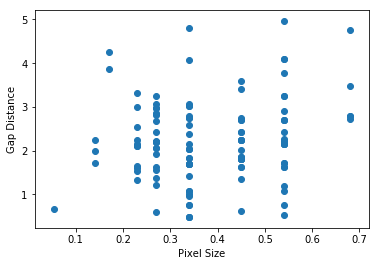

In [146]:
plt.scatter(wb['Pixel Size of Item(nm)'], wb['Gap Distance (nm)'])
# plt.plot(np.unique(x), np.poly1d(np.polyfit(wb['Pixel Size of Item(nm)'], wb['Gap Distance (nm)'], 1))(np.unique(x)))
plt.xlabel('Pixel Size')
plt.ylabel('Gap Distance')

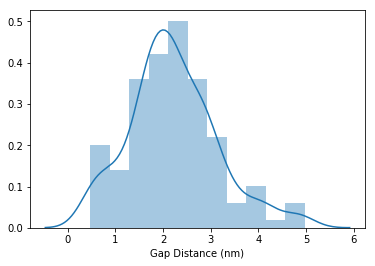

In [147]:
import seaborn as sns
sns.distplot(gap_histo)
plt.show()

In [208]:
import numpy as np

import numpy as np

best_dict = {}

for peak in convert:
    print(peak)
    exp_temp = exp_dict[peak]
    
    vc_temp = vc_dict[convert[peak]]
    vc_temp = vc_temp.reset_index()
    
    sp = 1.15
    total_count = 0

    test_spectra = exp_dict[peak].copy()
    test_spectra['Q_ext'] = 0.0
    
    for _, row in vc_temp.iterrows():

        leng = row['Size']
        num = row['Count']

        if leng > 35:
            break

        spdf = net_dict[leng]['%.2f' % sp]
        test_spectra['Q_ext'] += spdf * num
        total_count += num

    test_spectra['Q_ext'] = test_spectra['Q_ext'] / total_count
    testing = test_spectra.join(exp_temp, rsuffix='exp').drop('waveexp', axis=1)
    testing['Q_ext'] = testing['Q_ext'] / testing['Q_ext'].max()
    testing['Q_extexp'] = testing['Q_extexp'] / testing['Q_extexp'].max()

    diff_350 = testing['Q_ext'][0] - testing['Q_extexp'][0]
    testing['Q_extexp'] += diff_350  
    
    best_testing = testing

    plt.plot(best_testing['wave'], best_testing['Q_ext'], label='theory')
    plt.plot(best_testing['wave'], best_testing['Q_extexp'], label='exp')
    plt.legend()

    plt.title(f'Generated vs. Experimental Spectra _{peak}_peak_{sp}nm_spacing')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity (arbitrary units)')
    plt.savefig(f'{peak}_sample.png')
    plt.close()
    
    df = pd.DataFrame({'wl': best_testing['wave'], 'computed': best_testing['Q_ext'], 'experimental': best_testing['Q_extexp']})
    df.to_csv(f'{peak}_sample.csv')

590
610
620
630
640


In [43]:
import scipy


def get_norm_pdf(offsetZ=0, offsetS=0):

    param = (1.25 + offsetZ, 0.1 + offsetS)
    dist = scipy.stats.norm
    X = np.linspace(0.80,4, 65)
    pdf_fitted = dist.pdf(X, *param)
    pdf_fitted = pdf_fitted / pdf_fitted.sum()
    return pdf_fitted

  1%|          | 2/200 [00:00<00:12, 16.49it/s]

590


100%|██████████| 200/200 [00:08<00:00, 26.82it/s]


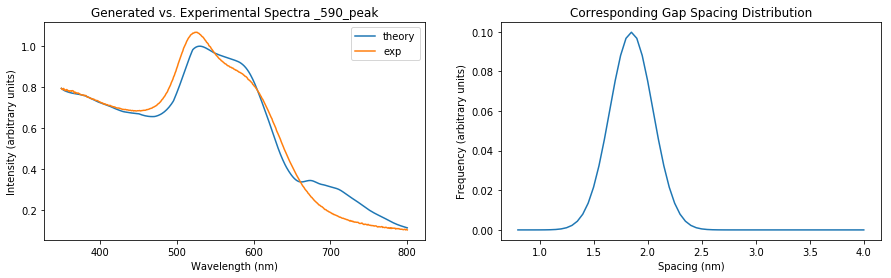

In [84]:
from tqdm import tqdm
from itertools import product
import random 

def call():
    out_dict = {}

    for peak in convert:
        print(peak)
        exp_temp = exp_dict[peak]

        vc_temp = vc_dict[convert[peak]]
        vc_temp = vc_temp.reset_index()

        z_dist_perturbs = np.arange(-.45, 3.75, 0.05)
        s_dist_perturbs = np.arange(0, 2.0, 0.05)

        all_sweep = product(z_dist_perturbs, s_dist_perturbs)
        random_sweep = random.sample(list(all_sweep), 200)

        best_error = 10000000
        best_params = None
        best_testing = None

        for params in tqdm(random_sweep):
            pdf_fitted = get_norm_pdf(*params)
            test_spectra = exp_dict[peak].copy()
            total_count = 0
            test_spectra['Q_ext'] = 0.0    

            for _, row in vc_temp.iterrows():
                leng = row['Size']
                num = row['Count']

                if leng > 27:
                    break

                gaps = ['%.2f' % sp for sp in np.arange(0.8, 4.05, 0.05)]            
                test_spectra['Q_ext'] += net_dict[leng][gaps] @ pdf_fitted * num

            testing = test_spectra.join(exp_temp, rsuffix='exp').drop('waveexp', axis=1)
            testing['Q_ext'] = testing['Q_ext'] / testing['Q_ext'].max()
            testing['Q_extexp'] = testing['Q_extexp'] / testing['Q_extexp'].max()

            diff_350 = testing['Q_ext'][0] - testing['Q_extexp'][0]
            testing['Q_extexp'] += diff_350

            error = ((testing['Q_ext'] - testing['Q_extexp']) ** 2).sum()

            if error < best_error:
                best_params = params
                best_error = error
                best_sp = sp
                best_testing = testing
                out_dict[peak] = testing

        break
                
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
    ax1.plot(best_testing['wave'], best_testing['Q_ext'], label='theory')
    ax1.plot(best_testing['wave'], best_testing['Q_extexp'], label='exp')
    ax1.legend()

    ax1.title.set_text(f'Generated vs. Experimental Spectra _{peak}_peak')
    ax1.set(xlabel='Wavelength (nm)', ylabel='Intensity (arbitrary units)')

    ax2.plot(np.arange(0.8, 4.05, 0.05), get_norm_pdf(*best_params))
    ax2.title.set_text('Corresponding Gap Spacing Distribution')
#     ax2.xlabel.set_text('Spacing (nm)')
#     ax2.ylabel.set_text('Frequency (arbitrary units)')
    ax2.set(xlabel='Spacing (nm)', ylabel='Frequency (arbitrary units)')
#     plt.subplots_adjust(wspace = 5.0)
    plt.savefig(f'{peak}_sample.png')
    plt.show()

# %load_ext line_profiler
# %lprun -f call call()
call()

NameError: name 'best_params' is not defined

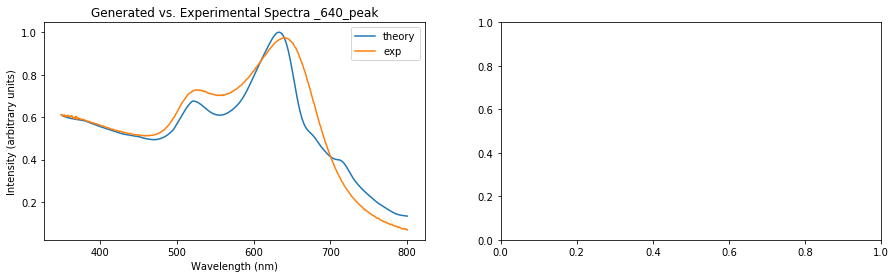

In [49]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
ax1.plot(best_testing['wave'], best_testing['Q_ext'], label='theory')
ax1.plot(best_testing['wave'], best_testing['Q_extexp'], label='exp')
ax1.legend()

ax1.title.set_text(f'Generated vs. Experimental Spectra _{peak}_peak')
ax1.set(xlabel='Wavelength (nm)', ylabel='Intensity (arbitrary units)')

ax2.plot(np.arange(0.8, 4.05, 0.05), get_norm_pdf(*best_params))
ax2.title.set_text('Corresponding Gap Spacing Distribution')
#     ax2.xlabel.set_text('Spacing (nm)')
#     ax2.ylabel.set_text('Frequency (arbitrary units)')
ax2.set(xlabel='Spacing (nm)', ylabel='Frequency (arbitrary units)')
#     plt.subplots_adjust(wspace = 5.0)
plt.show()

In [160]:
sample = '590'
best, best_df = best_dict[sample]

plt.plot(best_df['wave'], best_df['Q_ext'], label='theory')
plt.plot(best_df['wave'], best_df['Q_extexp'], label='exp')
plt.legend()

best = '%.2f' % best

plt.title(f'peak_{sample}_{best}nm_spacing')

KeyError: '590'

In [210]:
import numpy as np
from tqdm import tqdm

losses = []
spacings = np.arange(0.8, 4.05, 0.05)


for sp in tqdm(spacings): 
    
    total_loss = 0
    
    for peak in convert:
        exp_temp = exp_dict[peak]

        vc_temp = vc_dict[convert[peak]]
        vc_temp = vc_temp.reset_index()

        total_count = 0

        test_spectra = exp_dict[peak].copy()
        test_spectra['Q_ext'] = 0.0
        
        vc_temp = vc_temp[vc_temp['Size'] <= 35]        
        
        for _, row in vc_temp.iterrows():
            leng = row['Size']
            num = row['Count']
            
            spdf = net_dict[leng]['%.2f' % sp]
            test_spectra['Q_ext'] += spdf * num
            total_count += num
        
        test_spectra['Q_ext'] = test_spectra['Q_ext'] / total_count
        testing = test_spectra.join(exp_temp, rsuffix='exp').drop('waveexp', axis=1)
        testing['Q_ext'] = testing['Q_ext'] / testing['Q_ext'].max()
        testing['Q_extexp'] = testing['Q_extexp'] / testing['Q_extexp'].max()

        diff_350 = testing['Q_ext'][0] - testing['Q_extexp'][0]
        testing['Q_extexp'] += diff_350
        
        error = ((testing['Q_ext'] - testing['Q_extexp']) ** 2).sum()
        
        total_loss += error
        
    losses.append(total_loss)
          
    


100%|██████████| 65/65 [00:10<00:00,  6.33it/s]


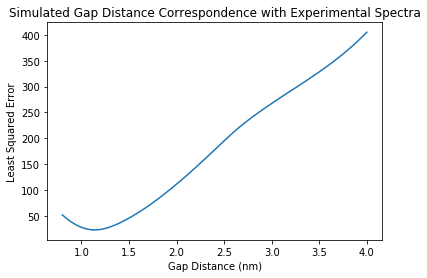

In [211]:
plt.title('Simulated Gap Distance Correspondence with Experimental Spectra')
plt.xlabel('Gap Distance (nm)')
plt.ylabel('Least Squared Error')
plt.plot(spacings, losses)

In [212]:
pd.DataFrame({'spacings': spacings, 'losses': losses})[0:20]

,spacings,losses
0,0.80,51.355590
1,0.85,43.647641
2,0.90,37.022231
3,0.95,31.563781
4,1.00,27.338951
5,1.05,24.399953
6,1.10,22.769076
7,1.15,22.424527
8,1.20,23.292861
9,1.25,25.237859


In [214]:
df = pd.DataFrame({'gap_distance': spacings, 'least_squares_error': losses})
df.to_csv('gap_distance_vs_error.csv')

In [624]:
import xarray as xr

new_net_dict = {}

for key in net_dict:
    df = net_dict[key]
    try:
        new_net_dict[key] = df.drop(columns=['wl']).rename(columns=float)
    except KeyError:
        pass

    try:
        new_net_dict[key] = df.drop(columns=['wave']).rename(columns=float)
    except KeyError:
        pass    

net_data = xr.DataArray(pd.Panel(new_net_dict), dims=('chain_length', 'wavelength', 'gap_spacing'))
net_data = net_data.sortby('chain_length')

net_data.assign_coords(wavelength=(net_data.wavelength * 0.5 + 350.0))

<xarray.DataArray (chain_length: 30, wavelength: 901, gap_spacing: 65)>
array([[[0.82492127, 0.82492127, 0.82492127, ..., 0.82492127,
         0.82492127, 0.82492127],
        [0.82332313, 0.82332313, 0.82332313, ..., 0.82332313,
         0.82332313, 0.82332313],
        [0.82163872, 0.82163872, 0.82163872, ..., 0.82163872,
         0.82163872, 0.82163872],
        ...,
        [0.02358426, 0.02358426, 0.02358426, ..., 0.02358426,
         0.02358426, 0.02358426],
        [0.0235687 , 0.0235687 , 0.0235687 , ..., 0.0235687 ,
         0.0235687 , 0.0235687 ],
        [0.02355041, 0.02355041, 0.02355041, ..., 0.02355041,
         0.02355041, 0.02355041]],

       [[1.04483671, 1.04502708, 1.04521098, ..., 1.04439342,
         1.04418227, 1.04396465],
        [1.04274616, 1.04292793, 1.04310369, ..., 1.04266728,
         1.04247697, 1.04228065],
        [1.04075343, 1.04093297, 1.04110656, ..., 1.04061528,
         1.04042533, 1.04022941],
        ...,
        [0.06132516, 0.06039711, 0.05948835, ..., 0.04025834,
         0.0405261 , 0.04081316],
        [0.06133557, 0.06040057, 0.05948513, ..., 0.04033421,
         0.04061129, 0.04090792],
        [0.06133923, 0.06039754, 0.05947565, ..., 0.04040403,
         0.0406902 , 0.04099618]],

       [[1.17850944, 1.17913787, 1.17975143, ..., 1.18937326,
         1.18908042, 1.18877272],
        [1.17625492, 1.17688448, 1.17749901, ..., 1.18684656,
         1.18654362, 1.18622564],
        [1.1741488 , 1.17477365, 1.17538356, ..., 1.18462655,
         1.18432474, 1.18400799],
        ...,
        [0.11039774, 0.10794907, 0.10555362, ..., 0.05919782,
         0.06004808, 0.06095155],
        [0.11046204, 0.10799813, 0.10558799, ..., 0.05938616,
         0.06025623, 0.06118008],
        [0.1105145 , 0.10803589, 0.10561159, ..., 0.05956516,
         0.06045457, 0.0613983 ]],

       ...,

       [[2.32873095, 2.32861613, 2.32857303, ..., 2.4087118 ,
         2.40951612, 2.41026838],
        [2.32492481, 2.32480627, 2.3247593 , ..., 2.40438239,
         2.40517313, 2.40591166],
        [2.32132409, 2.32119772, 2.32114282, ..., 2.40020342,
         2.400987  , 2.4017185 ],
        ...,
        [0.76175507, 0.73434531, 0.70763213, ..., 0.14356485,
         0.14218317, 0.14089596],
        [0.76186034, 0.73436646, 0.70757288, ..., 0.14338678,
         0.14199906, 0.14070419],
        [0.76186467, 0.73429296, 0.70742505, ..., 0.14319581,
         0.14180251, 0.14050046]],

       [[2.29212022, 2.296248  , 2.30031001, ..., 2.43655992,
         2.43754702, 2.43850123],
        [2.28838555, 2.29250263, 2.29655403, ..., 2.43222456,
         2.43319898, 2.43414034],
        [2.28485936, 2.28896033, 2.29299576, ..., 2.42795721,
         2.42892394, 2.42985774],
        ...,
        [0.77185935, 0.74412171, 0.71708819, ..., 0.1454609 ,
         0.14406349, 0.14276264],
        [0.77197293, 0.7441493 , 0.71703358, ..., 0.14527892,
         0.14387526, 0.1425665 ],
        [0.77198496, 0.74408159, 0.71688973, ..., 0.14508361,
         0.14367411, 0.1423579 ]],

       [[2.31769733, 2.32187304, 2.32598252, ..., 2.46407868,
         2.4650733 , 2.46603415],
        [2.31395784, 2.3181267 , 2.32222905, ..., 2.45970541,
         2.46069927, 2.46165991],
        [2.31035199, 2.31450809, 2.31859771, ..., 2.45539054,
         2.45637581, 2.45732797],
        ...,
        [0.78337544, 0.75520622, 0.72775214, ..., 0.14732351,
         0.14590581, 0.14458616],
        [0.78348913, 0.75523281, 0.72769548, ..., 0.14713902,
         0.14571493, 0.14438719],
        [0.78349812, 0.75516117, 0.72754685, ..., 0.14694098,
         0.1455109 , 0.14417553]]])
Coordinates:
  * chain_length  (chain_length) int64 1 2 3 4 5 6 7 8 ... 24 25 26 27 28 29 30
  * wavelength    (wavelength) float64 350.0 350.5 351.0 ... 799.0 799.5 800.0
  * gap_spacing   (gap_spacing) float64 0.8 0.85 0.9 0.95 ... 3.85 3.9 3.95 4.0

In [625]:
net_data.coords

Coordinates:
  * chain_length  (chain_length) int64 1 2 3 4 5 6 7 8 ... 24 25 26 27 28 29 30
  * wavelength    (wavelength) int64 0 1 2 3 4 5 6 ... 895 896 897 898 899 900
  * gap_spacing   (gap_spacing) float64 0.8 0.85 0.9 0.95 ... 3.85 3.9 3.95 4.0

In [578]:
net_data[12][0]

<xarray.DataArray (wavelength: 901, gap_distance: 67)>
array([[1.04483671, 1.04502708, 1.04521098, ..., 1.04396465,        nan,
        0.35      ],
       [1.04274616, 1.04292793, 1.04310369, ..., 1.04228065,        nan,
        0.3505    ],
       [1.04075343, 1.04093297, 1.04110656, ..., 1.04022941,        nan,
        0.351     ],
       ...,
       [0.06132516, 0.06039711, 0.05948835, ..., 0.04081316,        nan,
        0.799     ],
       [0.06133557, 0.06040057, 0.05948513, ..., 0.04090792,        nan,
        0.7995    ],
       [0.06133923, 0.06039754, 0.05947565, ..., 0.04099618,        nan,
        0.8       ]])
Coordinates:
    chain_length  int64 2
  * wavelength    (wavelength) int64 0 1 2 3 4 5 6 ... 895 896 897 898 899 900
  * gap_distance  (gap_distance) object '0.80' '0.85' '0.90' ... 'wave' 'wl'

In [573]:
help(net_data.drop)

Help on method drop in module xarray.core.dataarray:

drop(labels: Mapping = None, dim: Hashable = None, *, errors: str = 'raise', **labels_kwargs) -> 'DataArray' method of xarray.core.dataarray.DataArray instance
    Backward compatible method based on `drop_vars` and `drop_sel`
    
    Using either `drop_vars` or `drop_sel` is encouraged
    
    See Also
    --------
    DataArray.drop_vars
    DataArray.drop_sel



In [606]:
net_dict[12].drop(labels=['wl'], axis=1).rename(columns=float).keys()

Float64Index([ 0.8, 0.85,  0.9, 0.95,  1.0, 1.05,  1.1, 1.15,  1.2, 1.25,  1.3,
              1.35,  1.4, 1.45,  1.5, 1.55,  1.6, 1.65,  1.7, 1.75,  1.8, 1.85,
               1.9, 1.95,  2.0, 2.05,  2.1, 2.15,  2.2, 2.25,  2.3, 2.35,  2.4,
              2.45,  2.5, 2.55,  2.6, 2.65,  2.7, 2.75,  2.8, 2.85,  2.9, 2.95,
               3.0, 3.05,  3.1, 3.15,  3.2, 3.25,  3.3, 3.35,  3.4, 3.45,  3.5,
              3.55,  3.6, 3.65,  3.7, 3.75,  3.8, 3.85,  3.9, 3.95,  4.0],
             dtype='float64')